             DATE  units_sold
0      January-92        3459
1     February-92        3458
2        March-92        4002
3        April-92        4564
4          May-92        4221
..            ...         ...
320  September-18       12396
321    October-18       13914
322   November-18       14174
323   December-18       15504
324    January-19       10718

[325 rows x 2 columns]


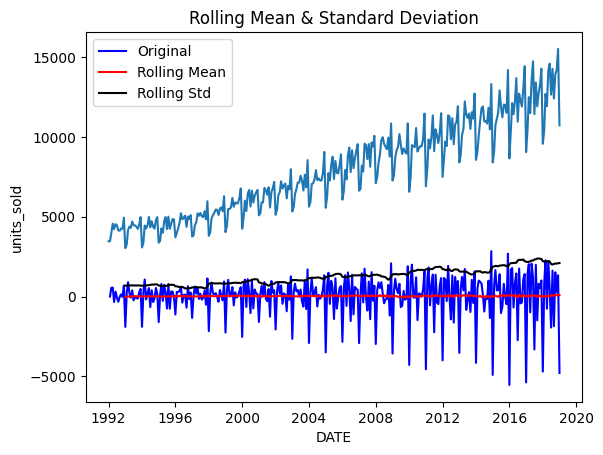

ADF Statistic: -4.365959619246078
p-value: 0.0003408284921169678
Critical Values:
	1%: -3.451621854687657
	5%: -2.870908950689806
	10%: -2.571761810613944


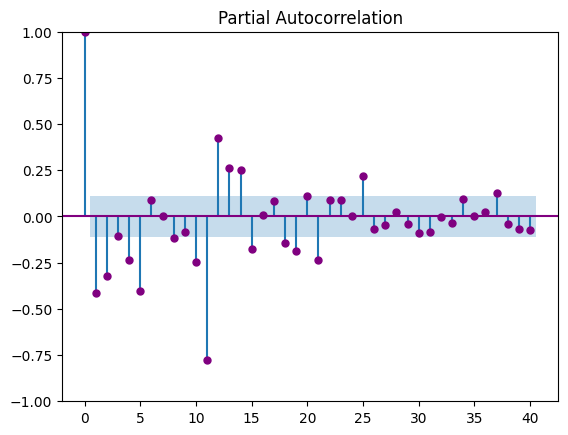

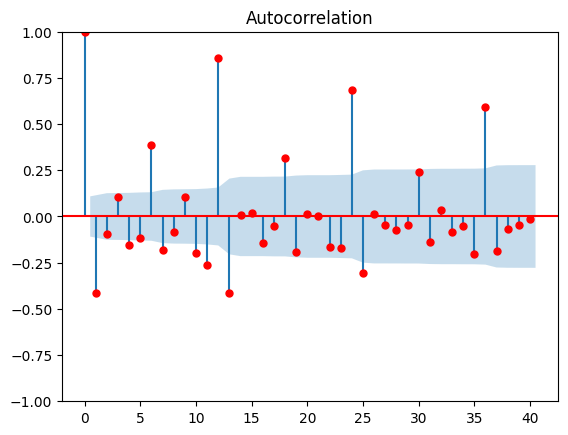

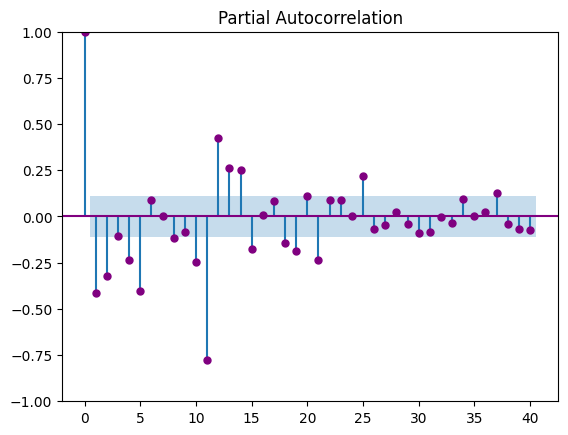

In [7]:
# Nedim Hodzic
# T54-574 - Lab 08

# Time Series 
# We will be using the Alcohol_Sales.csv data set for this part of the lab. The data set contains the monthly
#number of bottles sold from 1992 - 2019. 
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# 1. The date information is in a non-standard format. You will need to convert it to a datetime. The 
# function strptime() is one way to do this as shown in this link.  
df = pd.read_csv('/Users/nedim/Downloads/Alcohol_Sales.csv')
print(df)
df.describe()
string_data = df['DATE']
standard_date_data = [datetime.strptime(x, '%B-%y') for x in string_data]
df['DATE'] = standard_date_data

# 2. Make the date value an index using set_index() 
df.set_index('DATE', inplace = True) 

# 3. Plot the number of units sold vs time. Answer the following: 
sns.lineplot(x='DATE', y='units_sold', data=df)

# a. Are data independent?
# The data is not independent because we can see that it is dependent on time
# A trend is displayed that shows us that units sold has generally increased over time.

# b. Is the data stationery? 
# No. As shown in the chart the # of units sold over time is not consistent and fluctuates

# 4. Make the data stationery using differencing. This link shows several methods for differencing. 
# Use shift().  
df_shift = df - df.shift()
df_shift.dropna(inplace=True)

# 5. The link above provides a function for determining if the differencing made the data stationery. 
# It is reproduced here, removing the hard coded variable name. Use this function to test whether 
# the series is stationary.   
def get_stationarity(timeseries, varname): 
    """Title: get_stationerity 
    Function for testing whether time series data is stationery. 
 
    Args: 
        timeseries - Dateframe containing time series 
        varname - Name of the column containing the series values 
    """ 
    # rolling statistics 
    rolling_mean = timeseries.rolling(window=12).mean() 
    rolling_std = timeseries.rolling(window=12).std() 
     
    # rolling statistics plot 
    original = plt.plot(timeseries, color='blue', label='Original') 
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean') 
    std = plt.plot(rolling_std, color='black', label='Rolling Std') 
    plt.legend(loc='best') 
    plt.title('Rolling Mean & Standard Deviation') 
    plt.show(block=False) 
     
    # Dickey–Fuller test: 
    result = adfuller(timeseries[varname]) 
    print('ADF Statistic: {}'.format(result[0])) 
    print('p-value: {}'.format(result[1])) 
    print('Critical Values:') 
    for key, value in result[4].items(): 
        print('\t{}: {}'.format(key, value)) 

get_stationarity(df_shift, 'units_sold')

# 5a. Did differencing make the data stationery? 
# P<0.05, therefore we reject the null hypothesis so we can say the data is stationary.

# 5b. Do you see another issue with the data? Hint: Think about the other regression 
# assumptions, apart from independence. 
# neg. serial correlation

# 6. Generate ACF and PACF plots of the differenced data. For how to create the plots, see this link. 
# The function plot_pacf is also available in statsmodels.  
plot_acf(df_shift.units_sold, lags = 40, color = 'red')
plot_pacf(df_shift.units_sold, lags = 40, method='ywm', color = 'purple')

# a. Would a time series model be appropriate?  
# yes it would

# b. Will this require an ARIMA or a SARIMA model? Explain. 
# Will require SARIMA because of the seasonal pattern that we can see in our outputted plots 
